In [2]:
# Load the required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import prince


In [5]:
# Task 1 - Load a dataset and extract basic information 
df= pd.read_csv("data.csv")
print(df.shape,'\n')
print(df.info(),'\n')
print(df.describe(),'\n')
for col in df:
    print(col +' '+str(df[col].nunique()))

(11914, 16) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float

In [10]:
# Task 2 - Clean your data set
# If you are starting from this task, you can run cells from all previous tasks in 
# the kernel by going to Kernel > Restart and Run All
print(df.iloc[0,6])
df.iloc[0,6] = df.iloc[0,6] + ' '
print(df.iloc[0,6])

MANUAL
MANUAL 


In [11]:
print(df.groupby(['Transmission Type']).size(),'\n')
df['Transmission Type'].value_counts()

Transmission Type
AUTOMATED_MANUAL     626
AUTOMATIC           8266
DIRECT_DRIVE          68
MANUAL              2934
MANUAL                 1
UNKNOWN               19
dtype: int64 



AUTOMATIC           8266
MANUAL              2934
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
MANUAL                 1
Name: Transmission Type, dtype: int64

In [12]:
df= df.apply(lambda x: x.str.strip() if x.dtype=='object' else x)
df["Transmission Type"].value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: Transmission Type, dtype: int64

Make                 0.000000
Model                0.000000
Year                 0.000000
Engine Fuel Type     0.000252
Engine HP            0.005792
Engine Cylinders     0.002518
Transmission Type    0.000000
Driven_Wheels        0.000000
Number of Doors      0.000504
Market Category      0.314084
Vehicle Size         0.000000
Vehicle Style        0.000000
highway MPG          0.000000
city mpg             0.000000
Popularity           0.000000
MSRP                 0.000000
dtype: float64


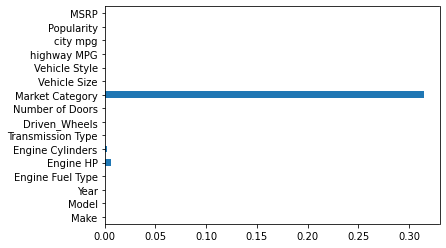

In [13]:
print(df.isna().mean())
df.isna().mean().plot(kind='barh')
df=df.loc[:,df.isna().mean()<.3]

In [14]:
df=df.replace("NA",np.nan)
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11812 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11812 non-null  object 
 1   Model              11812 non-null  object 
 2   Year               11812 non-null  int64  
 3   Engine Fuel Type   11812 non-null  object 
 4   Engine HP          11812 non-null  float64
 5   Engine Cylinders   11812 non-null  float64
 6   Transmission Type  11812 non-null  object 
 7   Driven_Wheels      11812 non-null  object 
 8   Number of Doors    11812 non-null  float64
 9   Vehicle Size       11812 non-null  object 
 10  Vehicle Style      11812 non-null  object 
 11  highway MPG        11812 non-null  int64  
 12  city mpg           11812 non-null  int64  
 13  Popularity         11812 non-null  int64  
 14  MSRP               11812 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


In [15]:
print(df.duplicated().sum())
df=df.drop_duplicates()
df.info()

720
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11092 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11092 non-null  object 
 1   Model              11092 non-null  object 
 2   Year               11092 non-null  int64  
 3   Engine Fuel Type   11092 non-null  object 
 4   Engine HP          11092 non-null  float64
 5   Engine Cylinders   11092 non-null  float64
 6   Transmission Type  11092 non-null  object 
 7   Driven_Wheels      11092 non-null  object 
 8   Number of Doors    11092 non-null  float64
 9   Vehicle Size       11092 non-null  object 
 10  Vehicle Style      11092 non-null  object 
 11  highway MPG        11092 non-null  int64  
 12  city mpg           11092 non-null  int64  
 13  Popularity         11092 non-null  int64  
 14  MSRP               11092 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 7 Text major ticklabel objects>)

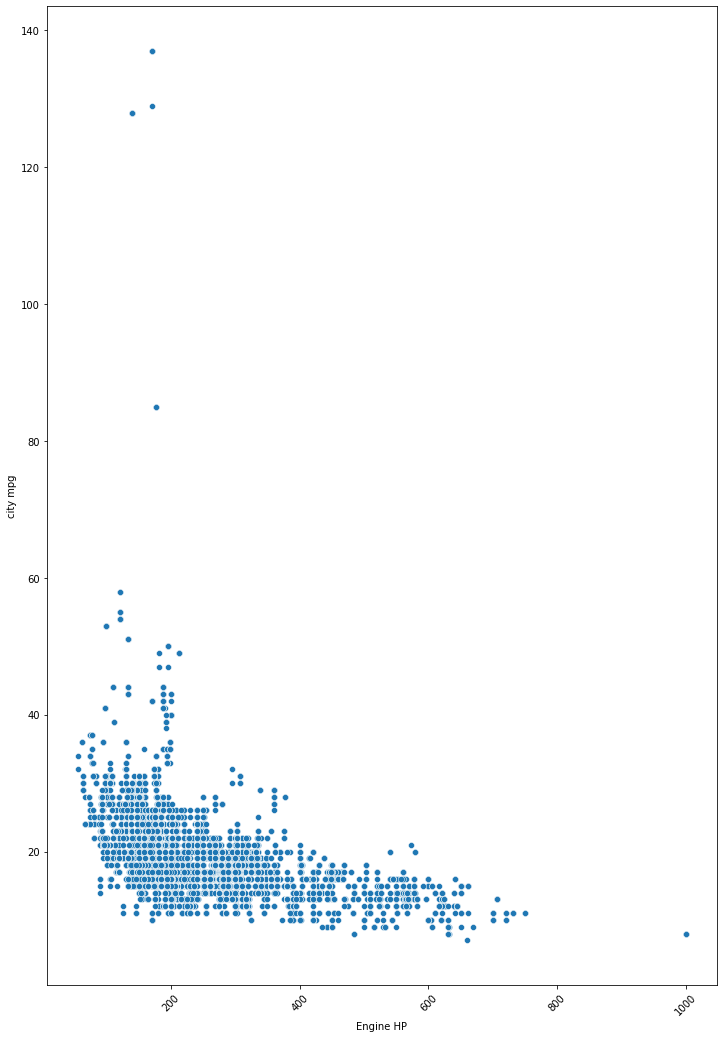

In [16]:
# Task 3 - Visualize patterns and outliers in your data set
# If you are starting from this task, you can run cells from all previous tasks in 
# the kernel by going to Kernel > Restart and Run All
fig,ax=plt.subplots(figsize=(12,18))
sns.scatterplot(x="Engine HP",y="city mpg", data=df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

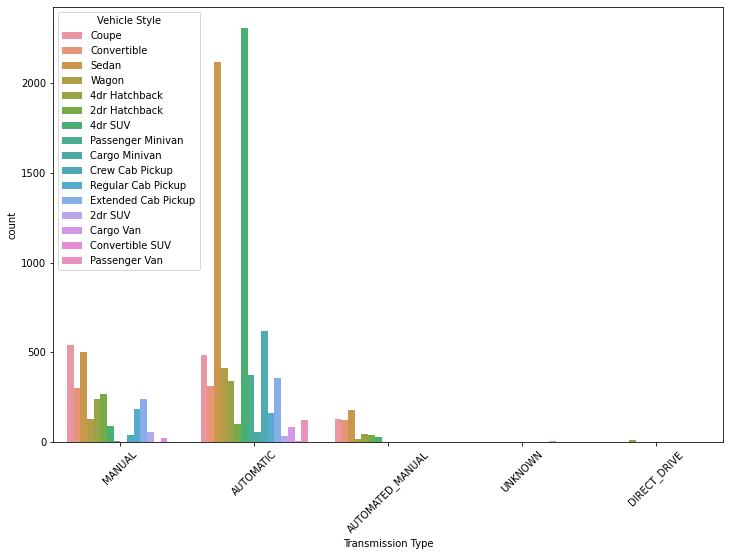

In [17]:
#creating count plot which counts the frequency of rows belonging to coloumn 
#additionally you can break this frequency by another coloun of intrest. let me show you how it is done:


fig,ax=plt.subplots(figsize=(12,8))
sns.countplot(x="Transmission Type", hue="Vehicle Style", data=df, ax=ax)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

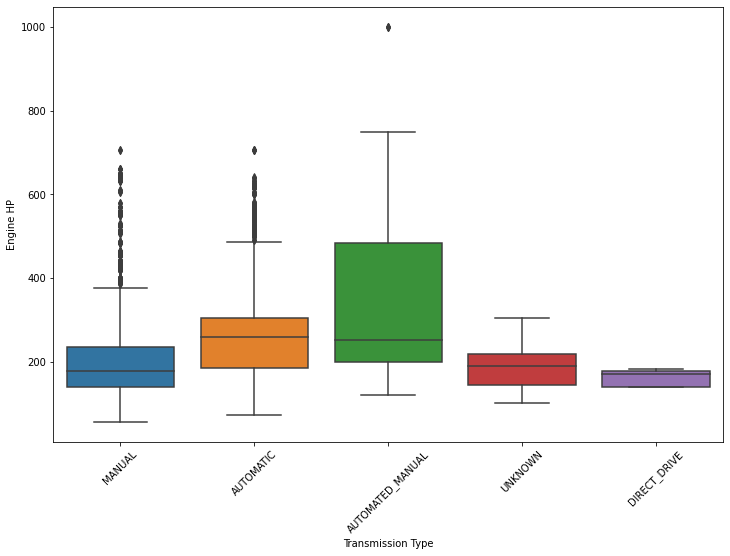

In [18]:
#now we will create a box plot, box plots are essential to identify the outliers in our dataset
#lets create box plot of transmission type and colour it with horsepower coloumn using the box plot function.
fig,ax=plt.subplots(figsize=(12,8))
sns.boxplot(x="Transmission Type", y="Engine HP", data=df)
plt.xticks(rotation=45)

#you will see that the automatic cars are of higher horsepower than the manual cars.
#also there appears to be an outlier with 1000 HP belonging to automated manual category.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


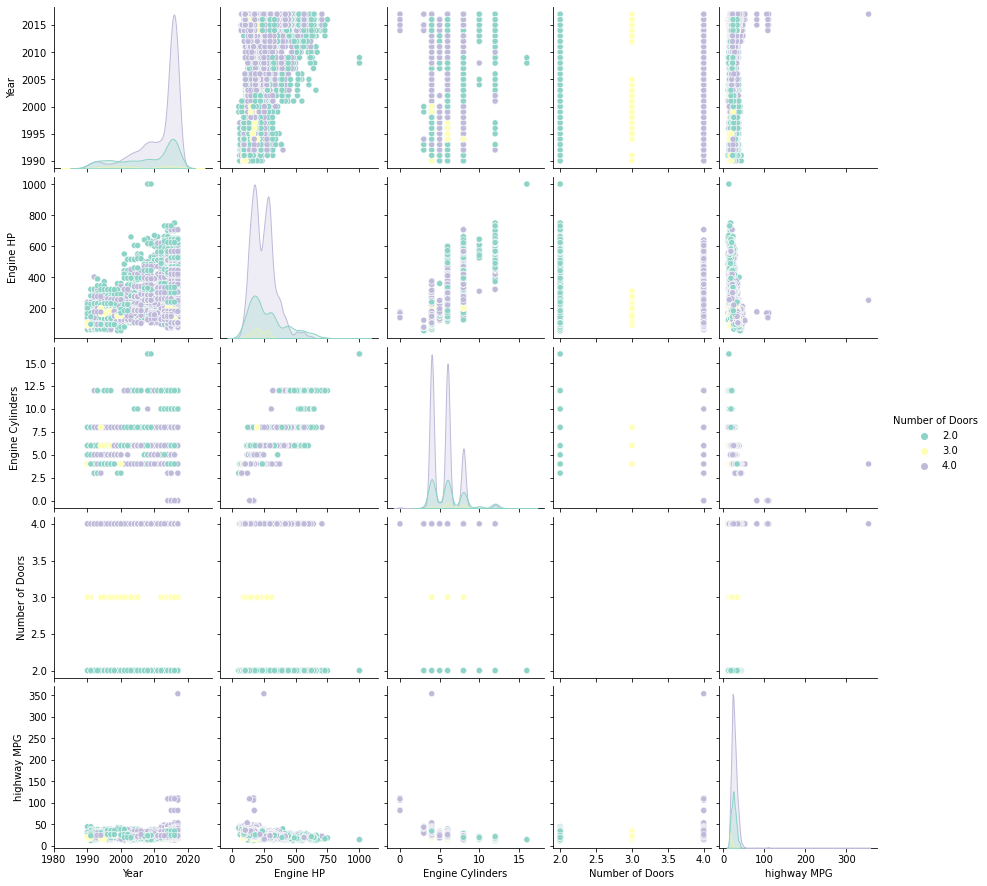

In [19]:
#now lastly we will discuss pair plot , pair plot is a scatter plot of each numeric coloumn with all other numeric coloumn including itself.
#it is a quick way to visualize numeric coloumns and any underlying patterns
#to create a pair plots u need to identify all numeric coloumns. 
#once done you can use pair plot function.
#you will create the pair plots for first five numeric coloumn for simplicity.

numeric_cols= df.select_dtypes(include=np.number).columns.tolist()
sns.pairplot(df, vars=numeric_cols[:5], hue="Number of Doors",palette="Set3")

#u can avoid this warning in red.. it may take while be patient..
#you will see a five by five matrix of plots with each numeric column plotted against every numeric column.
#the plots are brokendown by the number of doors to see any patterns.. 
#we see that the highway mpg is increasing over the past years
# and increase in horsepower reduces the highway mpg.

In [20]:
# Task 4 - Find and visualize correlations in your data set
# If you are starting from this task, you can run cells from all previous tasks in 
# the kernel by going to Kernel > Restart and Run 
#lets understand what we will do:

#In this we will calculate the correlation between different numeric column and visualize the corelations.
#correlation will help you determine whether any columns are correlated with each other as this will impact any data analytics project.
#correlation between two columns would range between -1 and +1
#negative correlation means if value in one column increases the value in other column decreases and vice versa.
#positive correlation means if value in one column increases the value in other column also increases and vice versa.

#so lets get into it.. in the previous task you found the numeric columns that you use for pair plots.
#you will utilize those column again for this task.
#first you will create data frame containing just these numeric column .
#you will then use this data frame to calculate the correlation using corr function in python which returns a correlation data frame.
#you an also print the correlation matrix. 
#type the following lines of code but dont run the cell yet.

df_num=df[numeric_cols]
df_corr=df_num.corr()
print(df_corr, "\n")

#next , you would like to know the mean correlation that each column has with other columns.
#this will help you identify highly correlated columns that could be problamatic for machine learning algorithms.
#even better would be the mean of the absolute correlation as the signs of the correlation should not matter to reflet highly correlated columns.
#type the following line of code and run:


print(df_corr.mean(),"\n")
print(df_corr.abs().mean(),"\n")






                      Year  Engine HP  ...  Popularity      MSRP
Year              1.000000   0.337207  ...    0.086693  0.209315
Engine HP         0.337207   1.000000  ...    0.041352  0.658987
Engine Cylinders -0.026926   0.788325  ...    0.042393  0.552042
Number of Doors   0.245804  -0.128704  ...   -0.059199 -0.145690
highway MPG       0.265521  -0.423809  ...   -0.024804 -0.207796
city mpg          0.220037  -0.474851  ...   -0.007093 -0.232722
Popularity        0.086693   0.041352  ...    1.000000 -0.048438
MSRP              0.209315   0.658987  ...   -0.048438  1.000000

[8 rows x 8 columns] 

Year                0.292206
Engine HP           0.224813
Engine Cylinders    0.119831
Number of Doors     0.127319
highway MPG         0.119250
city mpg            0.106385
Popularity          0.128863
MSRP                0.223212
dtype: float64 

Year                0.298938
Engine HP           0.481654
Engine Cylinders    0.475859
Number of Doors     0.247688
highway MPG         0.4370

In [21]:
#LETS interpret the output:
#first u see the 8X8 table containing the correlation of each column with all columns.
#you can see Engine HP is positively correlated  with engines cylinders, which make sense as more cylinder means more power.
#after the table u see mean correlation of each column , but this takes into account of the signs and doesn't reflect the real mean value.
#the last output contain the mean of the absolute correlation , and you can see all columns have the values less than 0.5 , which is acceptable.


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text major ticklabel objects>)

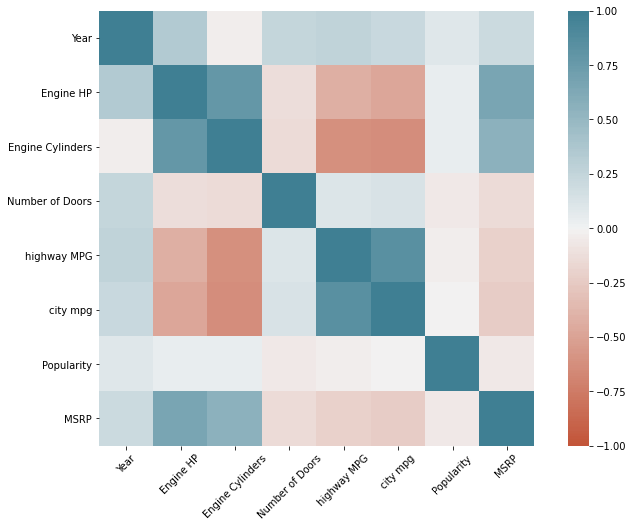

In [22]:
#lets make the plot to visualize the correlations,
#you will use heat map function from the seaborn library.

fig,ax=plt.subplots(figsize=(12,8))
sns.heatmap(df_corr ,square= True, vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20, 220, n=200))
plt.xticks(rotation=45)

#here the range of correlation is fixed between -1 and +1, and a diverging palette of colors are used.                                   

In [28]:
# Task 5 - Cluster your data set to identify similar groups
# If you are starting from this task, you can run cells from all previous tasks in 
# the kernel by going to Kernel > Restart and Run All

#in this task , you will learn about a data mining technique called clustering.
#that can help you identify similar groups in your dataset.
#clustering is technique of dividing your dataset into similar groups such that data points in the same group are more similar to other data point in the same group than those in other groups.
#lets get into it:
#KMeans is the most polpular type of clustering technique, which is based on distances between data points.
#you will need to set the no. of clusters beforehand.
#the algorithm will then divide the data points into those number of clusters, such that 
#each point is closer to its own cluster center than to other cluster centers.

#for this purpose , you will use data frame containing numeric column from our previous task.
#first print the column name in your dataset .
#as each column has different measurement and units, you will need to normalize each column so that each column has the mean 0 and standard deviation of 1
#you can use standard scalar function for this purpose.
#After normalizing the data set , you would use the KMeans function initialized with five clusters and fit your data set.
#using this fit , you will predict the grouping or clusters for each data point.
#once the fit is done, you can confirm by printing the unique cluster numbers in the result. 

#type the following lines of code and run the cell:

print(df_num.columns.tolist())
X= StandardScaler().fit_transform(df_num)
kmeans= KMeans(n_clusters=5, init='random')
kmeans.fit(X)
pred= kmeans.predict(X)
np.unique(pred)

#first you will see the names of the columns of your data set that we're using for clustering.
#next, you will see the number of clusters , which ranges from 0 to 4 as you have selected five clusters.



['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']


array([0, 1, 2, 3, 4], dtype=int32)

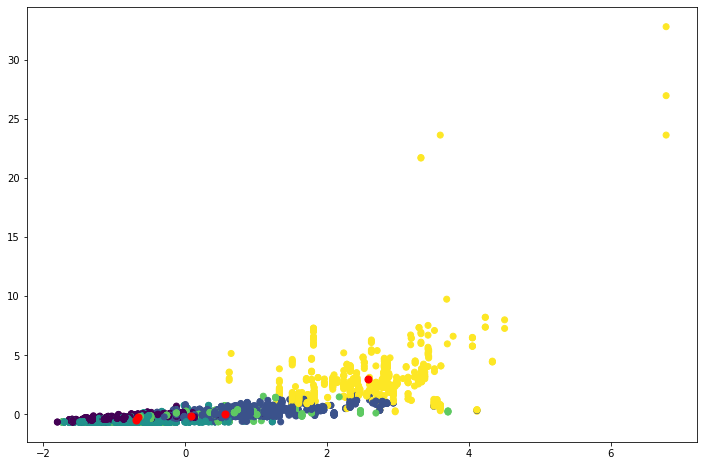

In [40]:
#lets plot the data points and their clusters .
#here you can select two columns , one for x axis and one for y axis to plot your data points, 
#and use the clustered groupings to color them differently.
#Lets select the horsepower column thats the 2nd column , and the price column thats the 8th column , and color the plot by cluster. 

#type the following lines of code and run the code:

fig,ax=plt.subplots(figsize=(12,8))
plt.scatter(X[:,1],X[:,7],c=pred,cmap='viridis')
#the plot shows a trend that one would expect: as the horsepower increases , the price of the car tends to increase.
# the data has been normalized hence the ranges doesn't reflect the origional values.
#each data point is colored differently according to its cluster.
#some clusters are easy to spot , but the trend is not strong enough to get clear clusters.

#lastly you can also plot the centres of the clusters over the plot you just created. 
#to do so store their centers in a variable called centers.
#next , plot the centres of the same column as the origional plot and color center as 'red' .
#type the following lines of code:

centers=kmeans.cluster_centers_
plt.scatter(centers[:,1], centers[:,7],c='red',s=50)

In [ ]:
#you will see additional red points which represent the cluster centers.
#in this task , we learned how to use clustering technique to find similar groups in your dataset.
#we saw ways to visualize dataset and the associated clusters.

In [42]:
# Task 6 - Visualize your data set with principal component analysis (PCA)
# If you are starting from this task, you can run cells from all previous tasks in 
# the kernel by going to Kernel > Restart and Run All

#in this final task, you will understand the concept of principal component analysis (PCA) and use it to visualize your dataset.
#PCA can help you visualize the data set which contains several column in a single plot.
#the dimension of dataset means the number of columns it has. PCA reduces a highly dimenshion data set to a simpler form.
#for example, PCA can convert 100 column datset into 2 columns while retaining the variation present in the data set.
#this is done by transforming the columns in the origional data set to new set of columns, 
#which are known as the principal component or simply the PC's.
#These PC's are ordered such that the retention of variation present in the origional columns decreases as u move down in the order.
#so in this way the first principal component retains maximum variation that was present in the origional components.
#you can use this PCs to plot the full dataset. lets get into it;
# we will cover two ways to calculate PCA as  they both differ in plotting capability.
#PCA can be calculated on scaled numeric columns. 
#lets say you want principal component that explains 95% of the variance in your dataset.
#you will first initiaalize the PCA function with this criteria. then you fit and transform your scale dataset.
#To see how many PCs were calculated you can print the variance retained by each principal component.

#type the following lines of code:

pca= PCA(n_components=0.95)
pca.fit(X)
pcad=pca.transform(X)
print(pca.explained_variance_ratio_)

#you will see 6 numbers as output.
# These are the variance retained by each component, with the first component retaining the maximum variance (i.e. 0.40608101).


[0.40608101 0.20002321 0.12974022 0.12532734 0.06433734 0.0398485 ]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


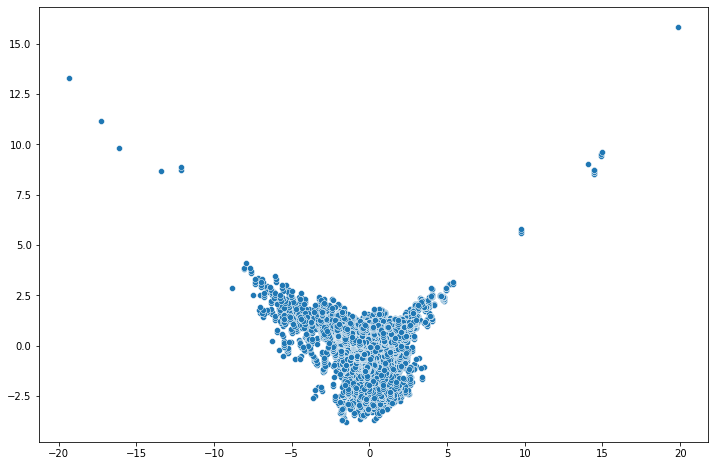

In [43]:
#now let see how to plot these principal components.
#scatter plot is the simplest way to visualize the PCs.

#type and run following code:

fig ,ax =plt.subplots(figsize=(12,8))
sns.scatterplot(pcad[:,0],pcad[:,1])

#here we are plotting the  first two principal components as they together explains maximum variance in your dataset (i.e 0.40608101 and 0.20002321).
#you will notice some points falling out towards the edge of the plots. these data points may be outliers.

In [44]:
#lets look at an alternate way to calculate PCA using a different library called Prince.
#the concept remains the same as above.
#you will use and initialize prince.PCA function  from the prince library , which can also scale your dataset and perform the PCA transformation.
#This is advantage over the previous way.
#you then fit your dataset to the prince.PCA function.
#you can also print the variance explained by each component and compare it to the previous way. It should be the similar.

#type and run the following code:


pca2=prince.PCA(n_components=6,n_iter=3,rescale_with_mean=True,
                rescale_with_std=True, copy=True,engine="auto")
pca2=pca2.fit(df_num)
pca2.explained_inertia_

#you will notice that the variance explained by the six components is the same as your previous way.


array([0.40608101, 0.20002321, 0.12974022, 0.12532734, 0.06433734,
       0.0398485 ])

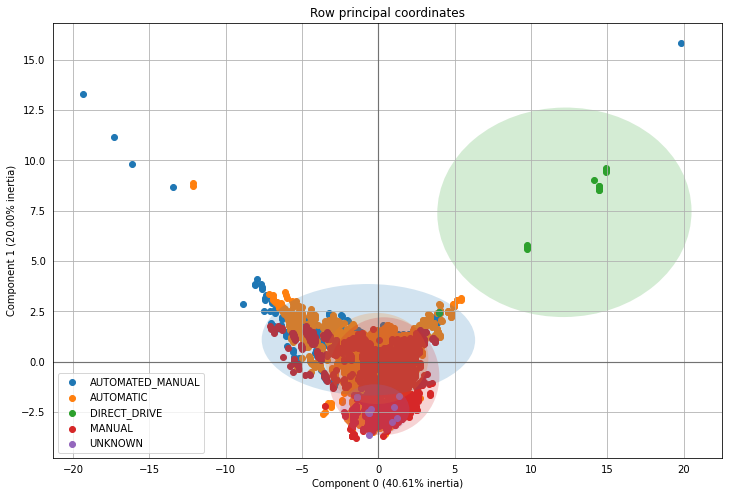

In [45]:
#to plot the result the library comes with the handy function called plot row coordinated.
#using this function u can color your data points by any column.

#lets try this out by running the following code:


ax= pca2.plot_row_coordinates(df_num,ax=None, figsize=(12,8),
                              x_component=0, y_component=1, labels=None,
                              color_labels=df['Transmission Type'],
                              ellipse_outline=False,ellipse_fill=True,
                              show_points=True)







In [ ]:
#here we are calculating 2PCs and plotting them, 
#coloring the data points by the transmission type column. 
#the plot identifies the outliers belonging to direct drive and automated manual transmission types.
#In this task we understood the concept of PCA and used it to visualize our dataset.

In [1]:
import distutils

In [2]:
print(distutils.__file__)

C:\Users\BHAVIT JAIN\ANACONDA\lib\distutils\__init__.py
